# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

# Load Data

In [2]:
df = pd.read_csv('../data/preprocessed_data.csv')
df.head()

,category,전략,신입,매니저,개발자,디자이너,웹,마,콘텐츠,이상,...,senior,digital,pm,machine,uiux,marketer,app,graphic,ad,coupang
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(7632, 106)

# X, y Split

In [4]:
X = df.drop('category', axis=1)
y = df[['category']]
print(X.shape, y.shape)

(7632, 105) (7632, 1)


# Class distribution

/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


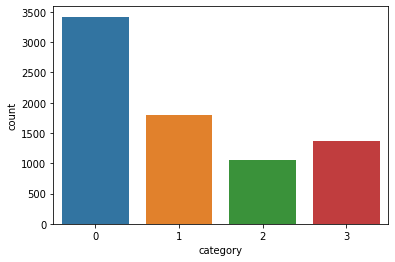

In [5]:
_ = sns.countplot(y['category'])

# Train/Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((5724, 105), (5724, 1), (1908, 105), (1908, 1))

In [7]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

# Hyperparameters Tuning

In [8]:
param_test1 = {
 'max_depth':range(3,10,3),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate=0.1,
        n_estimators=1000, 
        max_depth=5, 
        min_child_weight=1, 
        gamma=0, 
        subsample=0.8, 
        colsample_bytree=0.8,
        objective= 'multi:softmax', 
        nthread=-1, 
        scale_pos_weight=1,
        seed=2019),
    param_grid = param_test1,
    scoring='accuracy',
    #bs=-1,
    #iid=False,
    cv=5,
    verbose=10)

gsearch1.fit(X_train, y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START max_depth=3, min_child_weight=1.............................
[13:49:03] WARNING: ../src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:49:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/ubuntu/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5; 1/9] END max_depth=3, min_child_weight=1;, score=0.893 total time=   4.0s
[CV 2/5; 1/9] START max_depth=3, min_child_weight=1.............................
[13:49:07] WARNING: ../src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:49:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/ubuntu/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5; 1/9] END max_depth=3, min_child_weight=1;, score=0.852 total time=   3.9s
[CV 3/5; 1/9] START max_depth=3, min_child_weight=1.............................
[13:49:11] WARNING: ../src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:49:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/ubuntu/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


KeyboardInterrupt: 

In [ ]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch2 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate =0.1, 
        n_estimators=1000, 
        max_depth=3,
        min_child_weight=5, 
        gamma=0, 
        subsample=0.8, 
        colsample_bytree=0.8,
        objective= 'multi:softmax', 
        thread=-1, 
        scale_pos_weight=1,
        seed=2019),
    param_grid = param_test2,
    scoring='accuracy', 
    n_jobs=-1, 
    #iid=False, 
    cv=5,
    verbose=10)

gsearch2.fit(X_train, y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
}

gsearch3 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate =0.1, 
        n_estimators=1000, 
        max_depth=3,
        min_child_weight=5, 
        gamma=0, 
        subsample=0.8, 
        colsample_bytree=0.8,
        objective= 'multi:softmax', 
        thread=-1, 
        scale_pos_weight=1,
        seed=2019), 
    param_grid = param_test3, 
    scoring='accuracy', 
    n_jobs=-1, 
    #iid=False, 
    cv=5, 
    verbose=10)

gsearch3.fit(X_train, y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

# Fit Final Model

In [ ]:
params = {
    'max_depth': gsearch1.best_params_['max_depth'],
    'min_child_weight': gsearch1.best_params_['min_child_weight'],
    'gamma': gsearch2.best_params_['gamma'],
    'subsample': gsearch3.best_params_['subsample'],
    'colsample_bytree': gsearch3.best_params_['colsample_bytree'],
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 4,
#    'n_gpus' : 0
}

In [ ]:
bst = xgb.train(params, dtrain)

# Predict Test data

In [ ]:
pred = bst.predict(dtest)

In [ ]:
pred

# Model Evaluation

In [ ]:
# 0 개발
# 1 경영, 비즈니스
# 2 디자인
# 3 마케팅, 광고

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
cm = confusion_matrix(y_test, pred)
cm

<!-- 0 개발
1 경영, 비즈니스
2 디자인
3 마케팅, 광고 -->

In [ ]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)

plot_confusion_matrix(cm, ['producer 1', 'producer 2', 'producer 3'])

# Save Model

In [ ]:
pickle.dump(bst, open('../model/xgb-model-hpo', 'wb'))

In [47]:
# load model
# model = pickle.load(open('../model/xgb-model', 'rb'))